In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [4]:
train_path = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training"
test_path = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing"

gl_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/glioma_tumor"
men_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/meningioma_tumor"
no_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/no_tumor"
pit_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/pituitary_tumor"


gl_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/glioma_tumor"
men_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/meningioma_tumor"
no_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/no_tumor"
pit_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/pituitary_tumor"

gl_tr = os.listdir(gl_tr)
men_tr = os.listdir(men_tr)
no_tr = os.listdir(no_tr)
pit_tr = os.listdir(pit_tr)

gl_ts = os.listdir(gl_ts)
men_ts = os.listdir(men_ts)
no_ts = os.listdir(no_ts)
pit_ts = os.listdir(pit_ts)


In [5]:
print(len(gl_tr))
print(len(men_tr))
print(len(no_tr))
print(len(pit_tr))

826
822
395
827


In [6]:
print(len(gl_ts))
print(len(men_ts))
print(len(no_ts))
print(len(pit_ts))

100
115
105
74


In [7]:
gl_tr_label = [0]*len(gl_tr)
men_tr_label = [1]*len(men_tr)
no_tr_label = [2]*len(no_tr)
pit_tr_label = [3]*len(pit_tr)

gl_ts_label = [0]*len(gl_ts)
men_ts_label = [1]*len(men_ts)
no_ts_label = [2]*len(no_ts)
pit_ts_label = [3]*len(pit_ts)

In [8]:
train_label = gl_tr_label + men_tr_label + no_tr_label + pit_tr_label
test_label = gl_ts_label + men_ts_label + no_ts_label + pit_ts_label

In [9]:
print(len(train_label))
print(len(test_label))

2870
394


In [10]:
train_label[:4]

[0, 0, 0, 0]

In [11]:
test_label[-5:]

[3, 3, 3, 3, 3]

In [12]:
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [13]:
label = train_label + test_label
len(label)

3264

In [14]:
y = np.array(label)

In [15]:
y

array([0, 0, 0, ..., 3, 3, 3])

In [16]:
#gl_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/glioma_tumor"
#men_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/meningioma_tumor"
#no_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/no_tumor"
#pit_tr = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/pituitary_tumor"

#gl_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/glioma_tumor"
#men_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/meningioma_tumor"
#no_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/no_tumor"
#pit_ts = "C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/pituitary_tumor"

data = []

## For Training Data
for img_file in gl_tr:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/glioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in men_tr:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/meningioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in no_tr:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/no_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in pit_tr:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Training/pituitary_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
    
## For Testing Data
    
for img_file in gl_ts:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/glioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in men_ts:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/meningioma_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in no_ts:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/no_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)
    
for img_file in pit_ts:
    image = Image.open("C:/Users/pakiy/Desktop/DATA SCIENCE/archive (10)/Testing/pituitary_tumor/"+img_file)
    image = image.resize((224,224))
    image = np.array(image)
    data.append(image)

In [18]:
x = np.array(data)
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [19]:
print(x.shape)
print(y.shape)

(3264, 224, 224, 3)
(3264,)


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2937, 224, 224, 3)
(327, 224, 224, 3)
(2937,)
(327,)


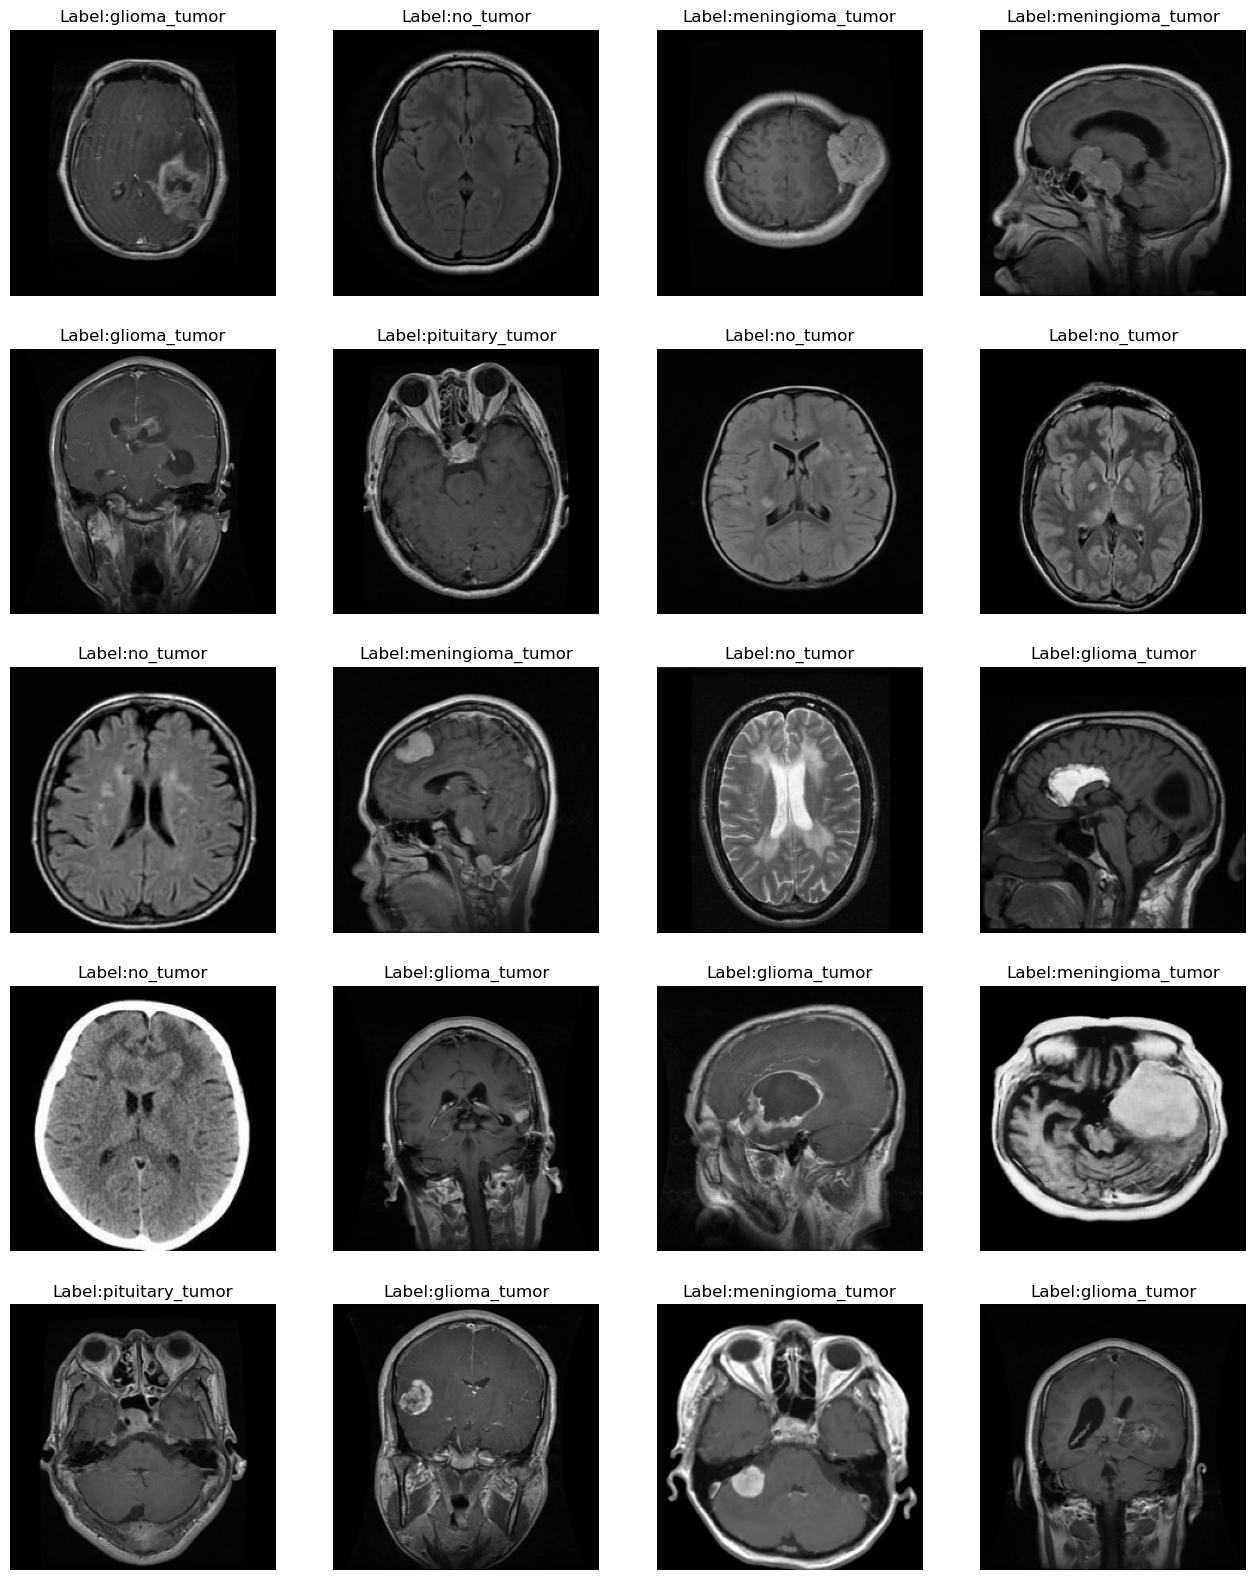

In [21]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Label:{class_labels[y_train[i]]}")
    plt.axis("off")

In [22]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [23]:
# MobileNet V2 Classification 100%  224x224
path1 ="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"

path="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
pretrained_model = hub.KerasLayer(path1, input_shape=(224,224,3), trainable=False)
num_class = 4
pre_model = Sequential()
pre_model.add(pretrained_model)
pre_model.add(Dense(units=num_class,activation="softmax"))

pre_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 4)                 4008      
                                                                 
Total params: 3544273 (13.52 MB)
Trainable params: 4008 (15.66 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [24]:
#compiling and training the previously defined pre_model using the Adam optimizer, 
#sparse categorical crossentropy as the loss function, and accuracy as the metric
pre_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_1 = pre_model.fit(x_train_scaled, y_train ,
          batch_size=32, epochs=15, validation_data = (x_test_scaled,y_test))

Epoch 1/15



92/92 [==============================] - 101s 992ms/step - loss: 0.8138 - accuracy: 0.6793 - val_loss: 0.5765 - val_accuracy: 0.7615
Epoch 2/15
92/92 [==============================] - 76s 832ms/step - loss: 0.4878 - accuracy: 0.8175 - val_loss: 0.4776 - val_accuracy: 0.8104
Epoch 3/15
92/92 [==============================] - 76s 827ms/step - loss: 0.4180 - accuracy: 0.8451 - val_loss: 0.4255 - val_accuracy: 0.8440
Epoch 4/15
92/92 [==============================] - 76s 824ms/step - loss: 0.3762 - accuracy: 0.8543 - val_loss: 0.3915 - val_accuracy: 0.8624
Epoch 5/15
92/92 [==============================] - 79s 857ms/step - loss: 0.3345 - accuracy: 0.8798 - val_loss: 0.3856 - val_accuracy: 0.8563
Epoch 6/15
92/92 [==============================] - 75s 814ms/step - loss: 0.3073 - accuracy: 0.8931 - val_loss: 0.3861 - val_accuracy: 0.8563
Epoch 7/15
92/92 [==============================] - 75s 818ms/step - loss: 0.2880 - accuracy: 0.9013 - val_loss: 0.3831 - val_accuracy: 0.8899
Epoch 8/1

In [30]:
# Evaluate the model on the training data
loss, acc = pre_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
# Evaluate the model on the testing data
val_loss, val_acc = pre_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 23s 249ms/step - loss: 0.1971 - accuracy: 0.9333
Loss on Train Data: 0.19706997275352478
Accuracy on Train Data: 0.933265209197998

11/11 [==============================] - 2s 208ms/step - loss: 0.3680 - accuracy: 0.8624
Loss on Test Data: 0.36800676584243774
Accuracy on Test Data: 0.8623853325843811


In [31]:
acc = history_1.history["accuracy"]
val_acc = history_1.history["val_accuracy"]

loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]

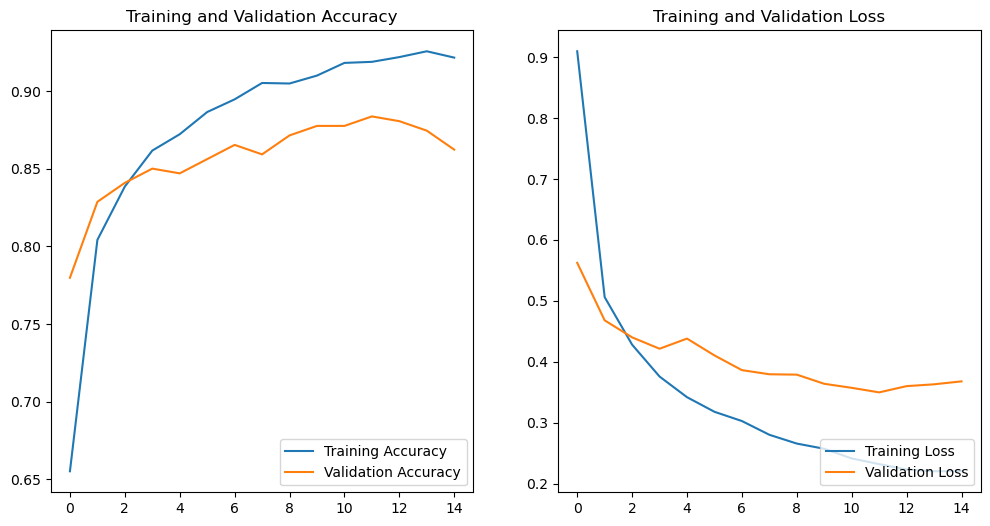

In [32]:
EPOCHS=15
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()


In [33]:

y_pred = pre_model.predict(x_test_scaled)

11/11 [==============================] - 3s 204ms/step


In [34]:
y_pred_test_label = [np.argmax(i) for i in y_pred]

In [35]:
y_pred_test_label[:10]  ## Predicted Images

[3, 1, 0, 3, 0, 3, 3, 2, 3, 1]

In [36]:
y_test[:10]  ## Actual Images

array([3, 1, 0, 3, 0, 3, 3, 2, 3, 0])

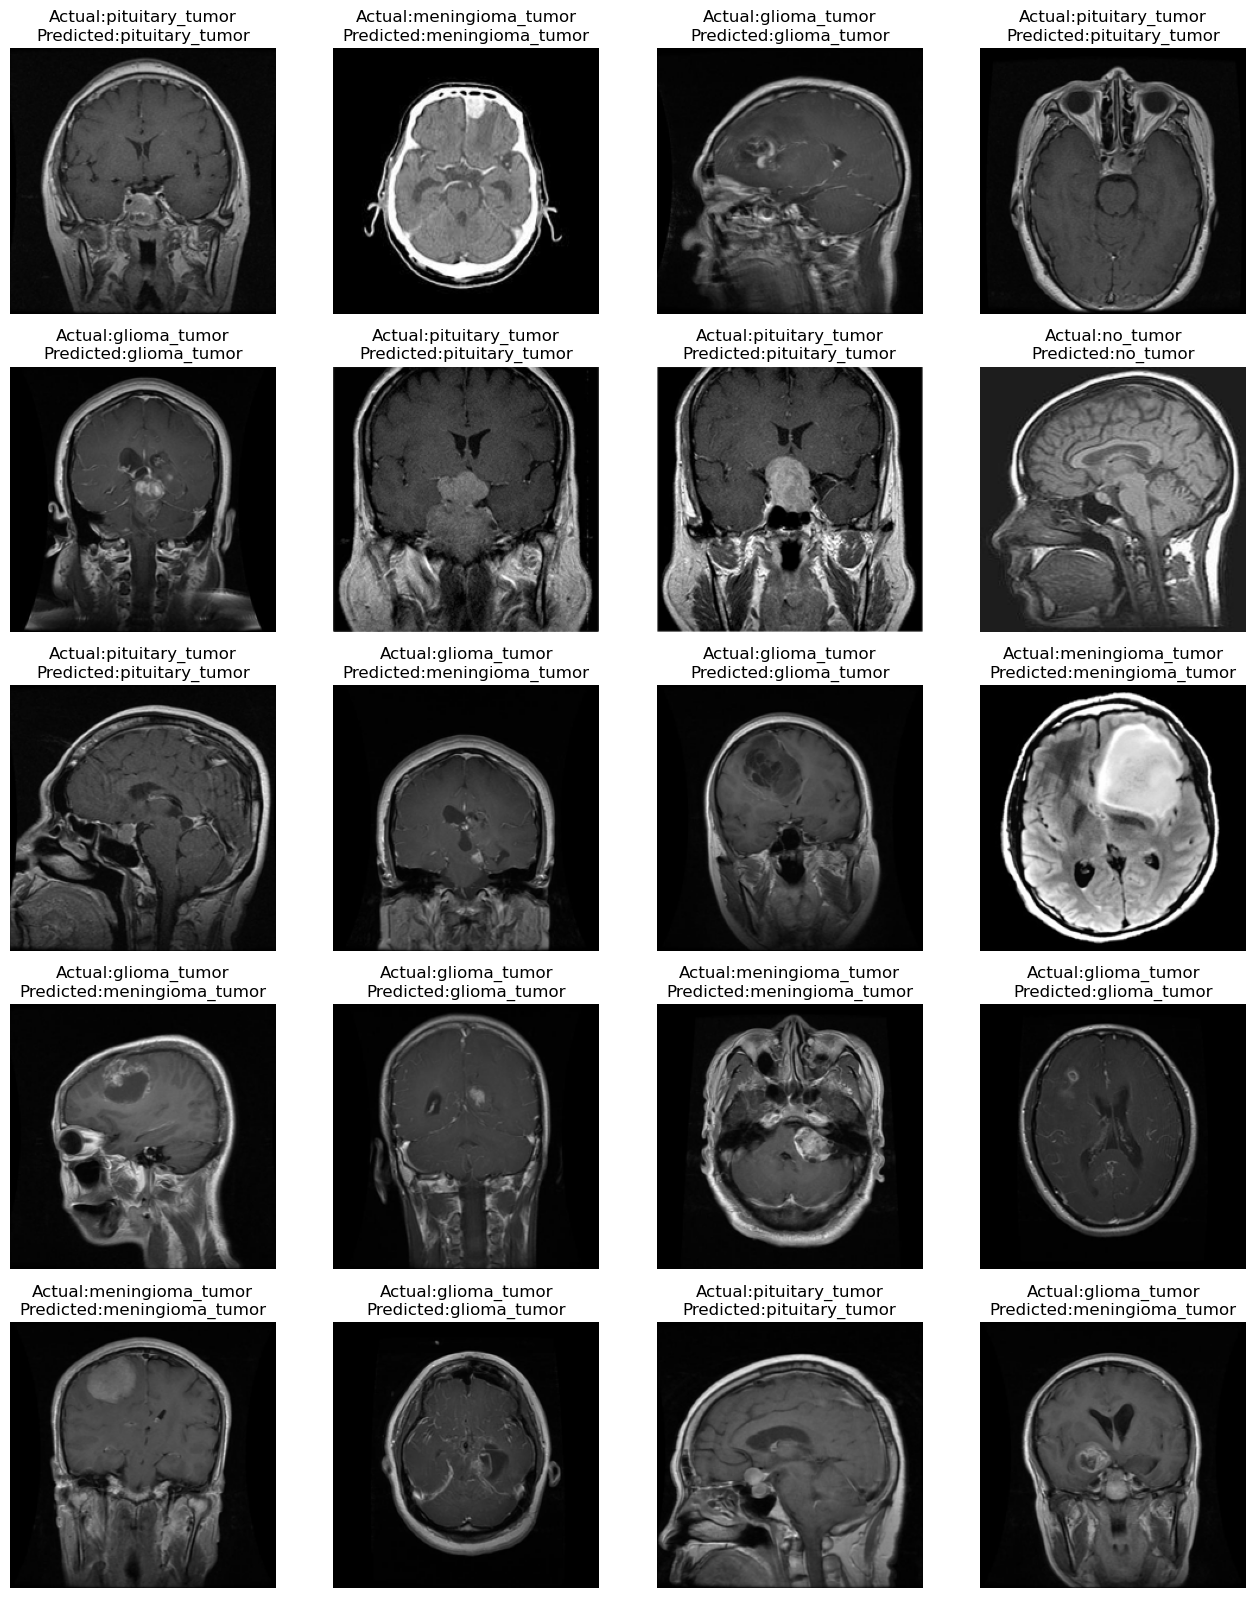

In [37]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

In [41]:
path = "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/5"  # 224x224x3
resnet_pre_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)

In [40]:
num_class = 4
resnet_model = Sequential()
resnet_model.add(resnet_pre_model)
resnet_model.add(Dense(units=num_class, activation="softmax"))

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              60382697  
                                                                 
 dense_1 (Dense)             (None, 4)                 4008      
                                                                 
Total params: 60386705 (230.36 MB)
Trainable params: 4008 (15.66 KB)
Non-trainable params: 60382697 (230.34 MB)
_________________________________________________________________


In [42]:
resnet_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_3 = resnet_model.fit(x_train_scaled, y_train ,
          batch_size=32, epochs=4, validation_data=(x_test_scaled, y_test))

Epoch 1/4
92/92 [==============================] - 273s 3s/step - loss: 1.0176 - accuracy: 0.6224 - val_loss: 0.6854 - val_accuracy: 0.7492
Epoch 2/4
92/92 [==============================] - 279s 3s/step - loss: 0.6015 - accuracy: 0.7753 - val_loss: 0.5648 - val_accuracy: 0.7829
Epoch 3/4
92/92 [==============================] - 280s 3s/step - loss: 0.5273 - accuracy: 0.8032 - val_loss: 0.5172 - val_accuracy: 0.8104
Epoch 4/4
92/92 [==============================] - 285s 3s/step - loss: 0.4771 - accuracy: 0.8260 - val_loss: 0.5407 - val_accuracy: 0.7982


In [43]:
loss, acc = resnet_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
val_loss, val_acc = resnet_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 250s 3s/step - loss: 0.4443 - accuracy: 0.8328
Loss on Train Data: 0.44429945945739746
Accuracy on Train Data: 0.8328226208686829

11/11 [==============================] - 29s 3s/step - loss: 0.5407 - accuracy: 0.7982
Loss on Test Data: 0.540723979473114
Accuracy on Test Data: 0.7981651425361633


In [44]:
y_pred = resnet_model.predict(x_test_scaled)
y_pred_test_label = [np.argmax(i) for i in y_pred]

print("Actual Label:",y_test[:10])
print("Predicted label:",y_pred_test_label[:10])

11/11 [==============================] - 31s 3s/step
Actual Label: [3 1 0 3 0 3 3 2 3 0]
Predicted label: [3, 2, 0, 3, 1, 3, 3, 2, 3, 0]


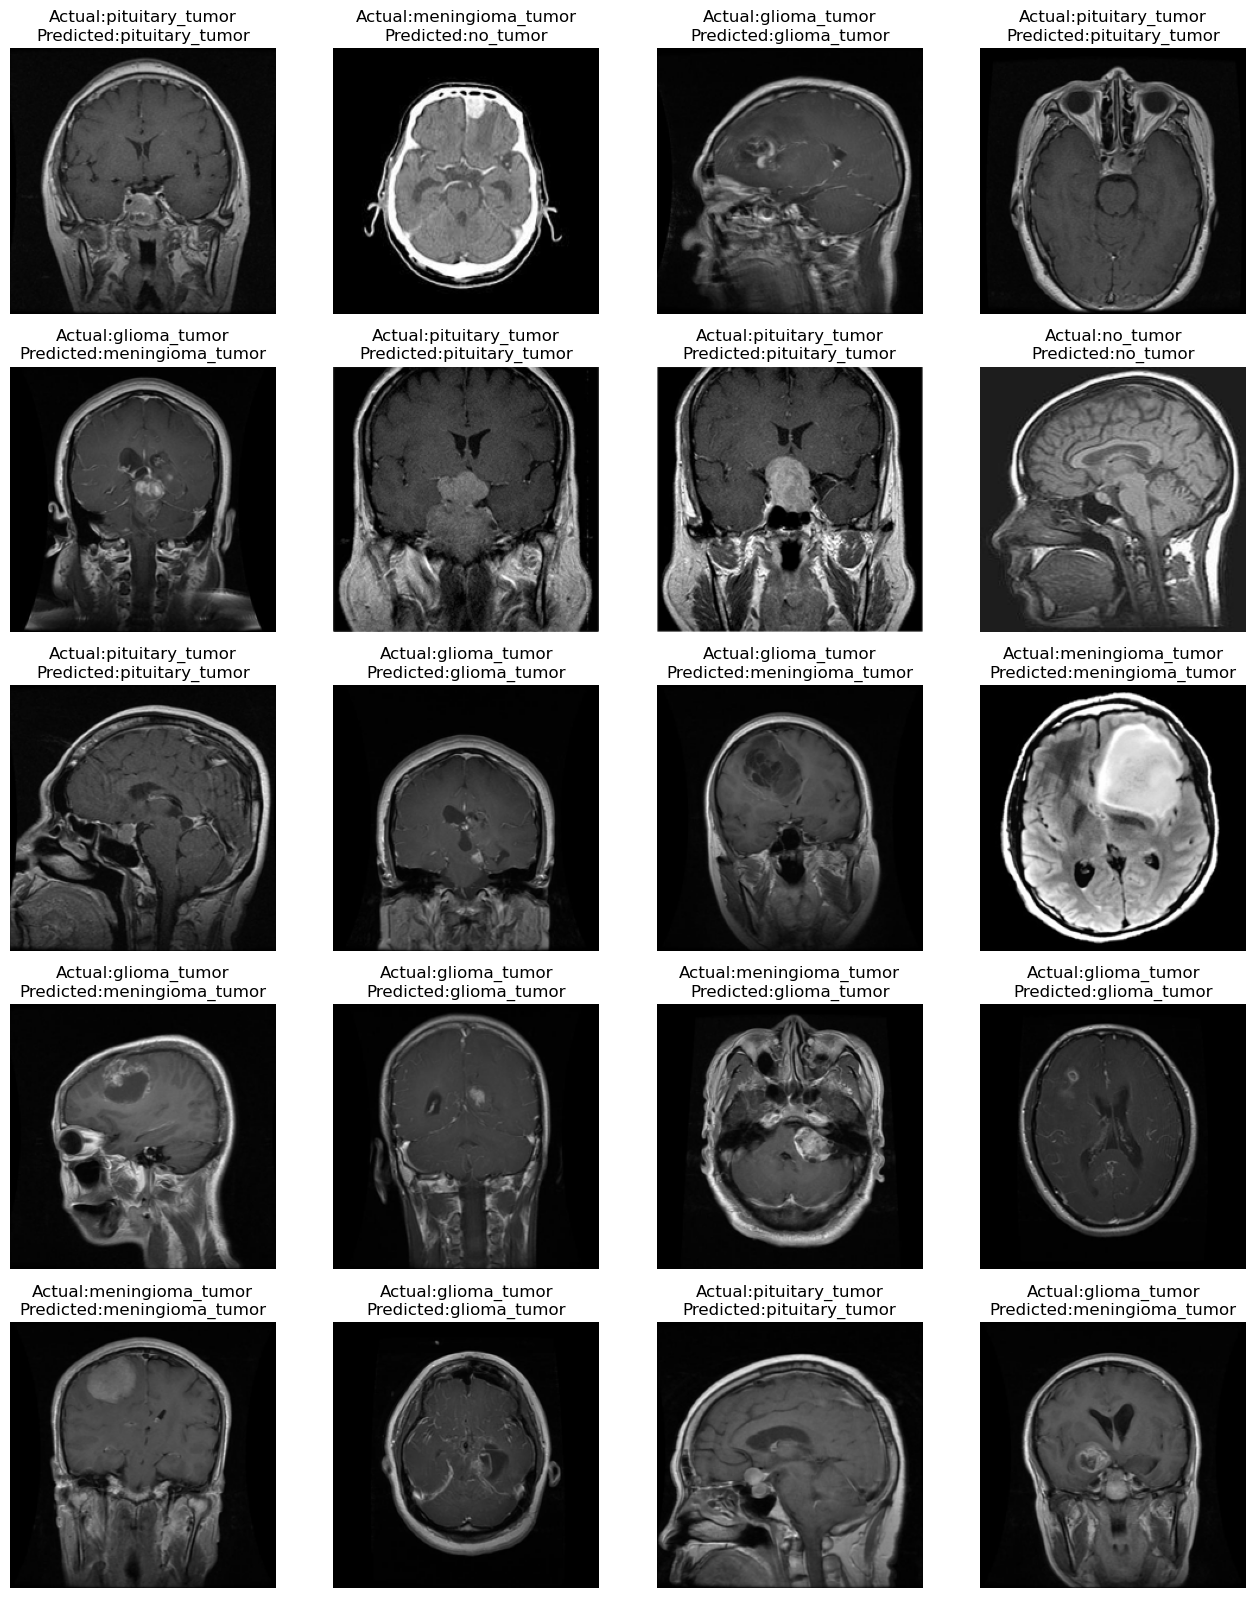

In [45]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

In [46]:
path = "https://tfhub.dev/google/efficientnet/b0/classification/1" # 224x224x3
efficient_model = hub.KerasLayer(path,input_shape=(224,224,3),trainable=False)

num_class = 4
eff_model = Sequential()
eff_model.add(efficient_model)
eff_model.add(Dense(units=num_class, activation="softmax"))

eff_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1000)              5330564   
                                                                 
 dense_2 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 5334568 (20.35 MB)
Trainable params: 4004 (15.64 KB)
Non-trainable params: 5330564 (20.33 MB)
_________________________________________________________________


In [47]:
eff_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_4 = eff_model.fit(x_train_scaled , y_train ,
          batch_size=32, epochs=5, validation_data=(x_test_scaled,y_test))

Epoch 1/5
92/92 [==============================] - 45s 422ms/step - loss: 0.8544 - accuracy: 0.6544 - val_loss: 0.5381 - val_accuracy: 0.7890
Epoch 2/5
92/92 [==============================] - 34s 365ms/step - loss: 0.5211 - accuracy: 0.7964 - val_loss: 0.4676 - val_accuracy: 0.8349
Epoch 3/5
92/92 [==============================] - 33s 358ms/step - loss: 0.4596 - accuracy: 0.8260 - val_loss: 0.4152 - val_accuracy: 0.8624
Epoch 4/5
92/92 [==============================] - 34s 366ms/step - loss: 0.4109 - accuracy: 0.8512 - val_loss: 0.4240 - val_accuracy: 0.8379
Epoch 5/5
92/92 [==============================] - 33s 361ms/step - loss: 0.3953 - accuracy: 0.8543 - val_loss: 0.3862 - val_accuracy: 0.8746


In [48]:
loss, acc = eff_model.evaluate(x_train_scaled,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)
print()
val_loss, val_acc = eff_model.evaluate(x_test_scaled,y_test)
print("Loss on Test Data:",val_loss)
print("Accuracy on Test Data:",val_acc)

92/92 [==============================] - 34s 359ms/step - loss: 0.3534 - accuracy: 0.8693
Loss on Train Data: 0.35335880517959595
Accuracy on Train Data: 0.8692543506622314

11/11 [==============================] - 4s 333ms/step - loss: 0.3862 - accuracy: 0.8746
Loss on Test Data: 0.38623377680778503
Accuracy on Test Data: 0.8746177554130554


In [49]:
y_pred = eff_model.predict(x_test_scaled)
y_pred_test_label = [np.argmax(i) for i in y_pred]

print("Actual Label:",y_test[:10])
print("Predicted label:",y_pred_test_label[:10])

11/11 [==============================] - 5s 313ms/step
Actual Label: [3 1 0 3 0 3 3 2 3 0]
Predicted label: [3, 2, 0, 3, 0, 3, 3, 2, 3, 0]


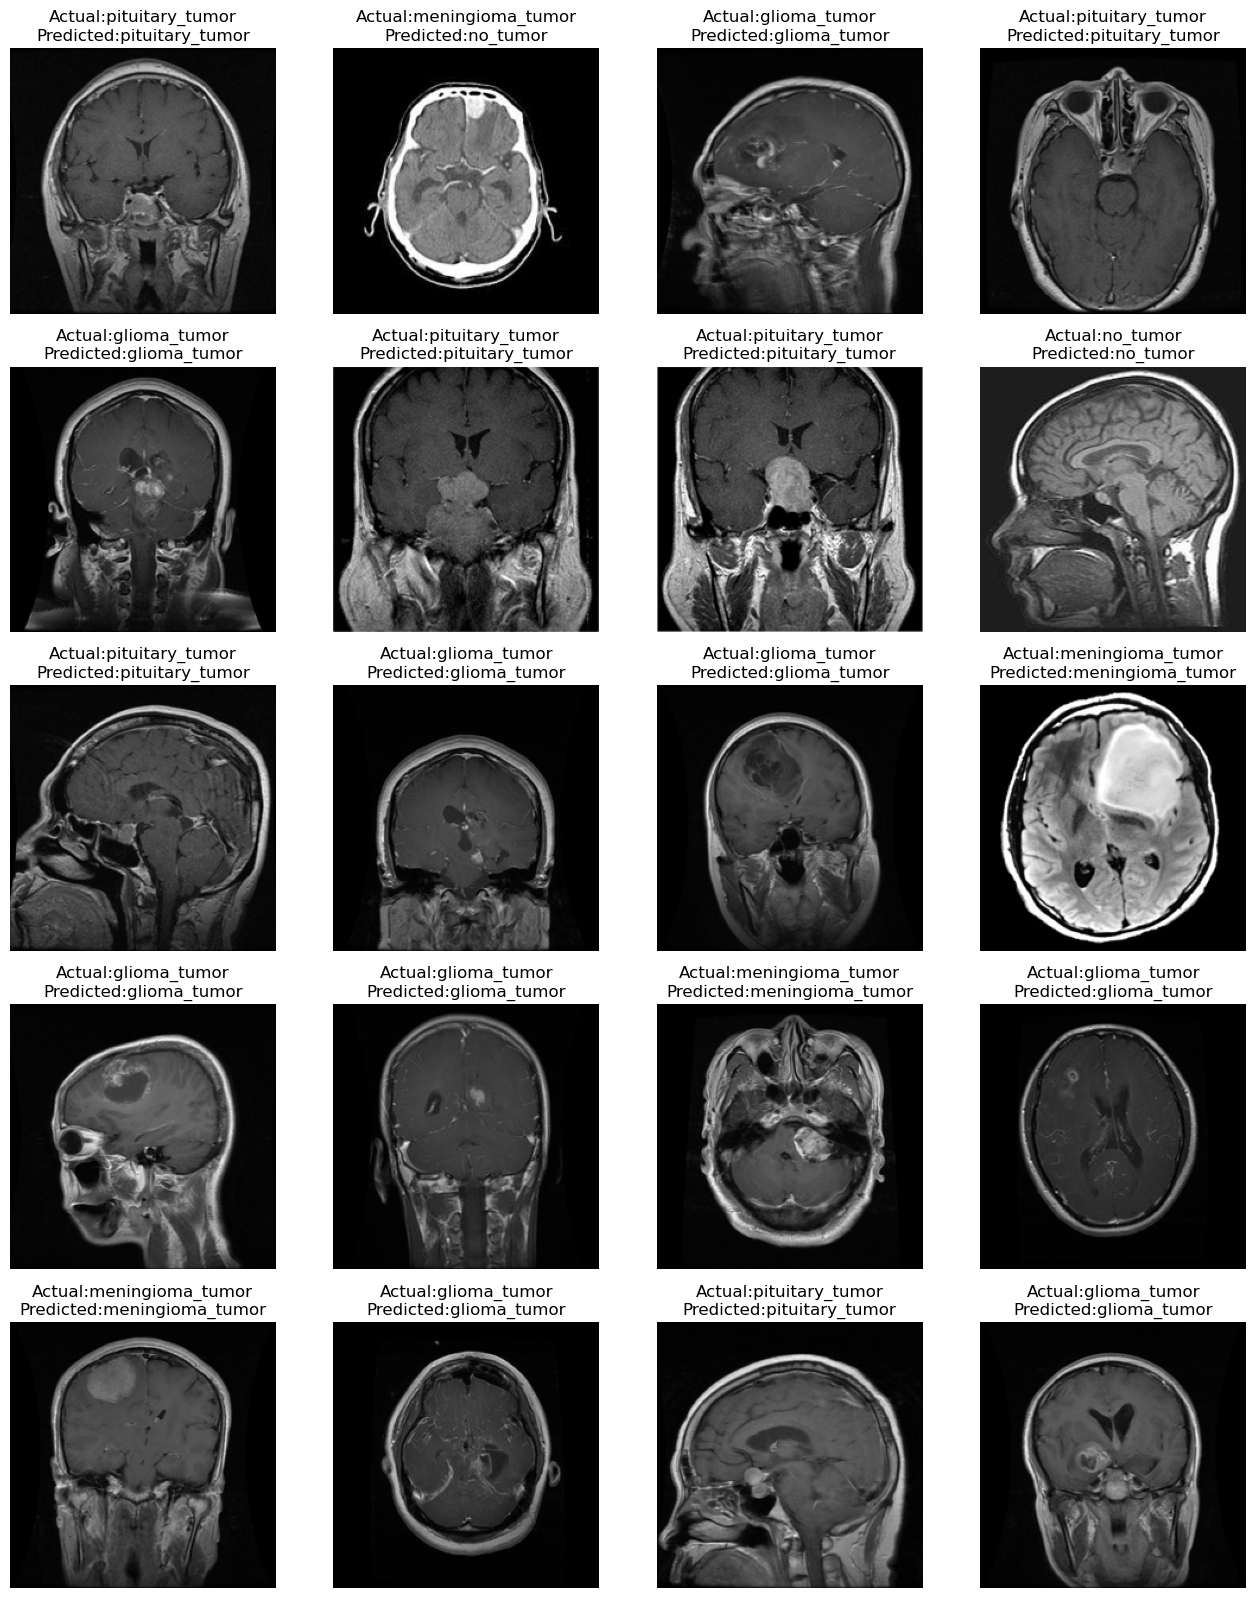

In [51]:
plt.figure(figsize=(16,20))
for i in range(0,20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")

In [1]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

    plt.show()

# Class labels
class_labels = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

# MobileNet V2
y_pred_mobile = pre_model.predict(x_test_scaled)
y_pred_mobile_label = [np.argmax(i) for i in y_pred_mobile]

print("MobileNet V2 Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_mobile_label, class_labels)
print("\nMobileNet V2 Classification Report:")
print(classification_report(y_test, y_pred_mobile_label, target_names=class_labels))

# ResNet
y_pred_resnet = resnet_model.predict(x_test_scaled)
y_pred_resnet_label = [np.argmax(i) for i in y_pred_resnet]

print("ResNet Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_resnet_label, class_labels)
print("\nResNet Classification Report:")
print(classification_report(y_test, y_pred_resnet_label, target_names=class_labels))

# EfficientNet
y_pred_efficient = eff_model.predict(x_test_scaled)
y_pred_efficient_label = [np.argmax(i) for i in y_pred_efficient]

print("EfficientNet Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_efficient_label, class_labels)
print("\nEfficientNet Classification Report:")
print(classification_report(y_test, y_pred_efficient_label, target_names=class_labels))


NameError: name 'pre_model' is not defined